# Covid-19 Hackathon
## Importing Libraries 
#### we want numpy for array , pandas for dataframe and matplotlib for data visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

## Loading the processed dataset
#### I only took the essential data in my dataset , hence it is already a processed dataset

In [2]:
country = pd.read_csv("Desktop/Covid-19.csv/countrywise cases.csv")
state = pd.read_csv("Desktop/Covid-19.csv/state wise cases.csv")
total = pd.read_csv("Desktop/Covid-19.csv/statewise total case.csv")
code = pd.read_csv("Desktop/Covid-19.csv/state name with code.csv")

#### Extracting information from data

In [3]:
country.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January,1,1,0,0,0,0
1,31 January,0,1,0,0,0,0
2,01 February,0,1,0,0,0,0
3,02 February,1,2,0,0,0,0
4,03 February,1,3,0,0,0,0


In [4]:
state.head()

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PY,PB,RJ,SK,TN,TG,TR,UP,UT,WB
0,14-Mar-20,Confirmed,79,0,1.0,0,0,0,0,0,...,0,1,3,0,1,1,0,12,0,0
1,14-Mar-20,Recovered,9,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,4,0,0
2,14-Mar-20,Deceased,2,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,Confirmed,28,0,0.0,0,0,0,0,0,...,0,0,1,0,0,2,0,1,0,0
4,15-Mar-20,Recovered,4,0,0.0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0


In [5]:
total.head()

,State,ConfirmeConfirmed,Recovered,Deaths,Active,Last_Updated_Time,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths
0,Total,9075,1061,303,7711,12/04/2020 20:30:24,TT,623,89,14
1,Maharashtra,1895,208,127,1560,12/04/2020 14:35:24,MH,134,0,0
2,Tamil Nadu,1075,50,11,1014,12/04/2020 18:10:24,TN,106,6,1
3,Delhi,1154,28,24,1102,12/04/2020 20:30:25,DL,85,1,5
4,Telangana,503,96,14,393,11/04/2020 22:10:24,TG,0,0,0


In [6]:
code.head()

,No.,State/ UT,Abbreviation
0,1,Andhra Pradesh,AP
1,2,Arunachal Pradesh,AR
2,3,Assam,AS
3,4,Bihar,BR
4,5,Chhattisgarh,CT


## National level prediction
## Data Visualization

In [260]:
India=[[],[],[]]
India[0] = list(country["Total Confirmed"])
India[1] = list(country["Total Recovered"])
India[2] = list(country["Total Deceased"])

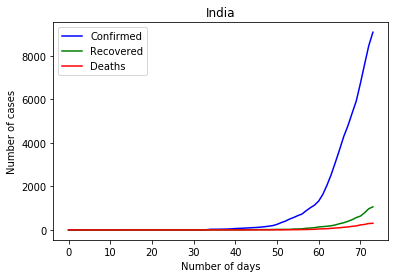

In [261]:
sr=[]
for i in range(74):
    sr.append(i)
plt.plot(sr,India[0] , c= "blue",label = "Confirmed")
plt.plot(sr,India[1] , c= "green",label = "Recovered")
plt.plot(sr,India[2] , c= "red",label = "Deaths")
plt.xlabel("Number of days")
plt.ylabel("Number of cases")
plt.title("India")
plt.legend()

#### The graph is exponential in nature

In [262]:
dif = [[],[],[]]
for i in range(len(India[0])-1):
    dif[0].append(India[0][i+1] - India[0][i])
    dif[1].append(India[1][i+1] - India[1][i])
    dif[2].append(India[2][i+1] - India[2][i])

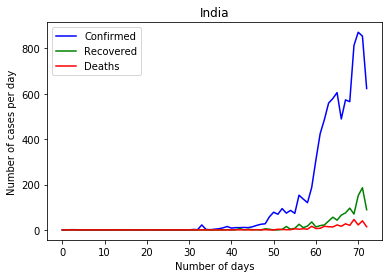

In [265]:
#del(sr[73])
plt.plot(sr,dif[0] , c= "blue",label = "Confirmed")
plt.plot(sr,dif[1] , c= "green",label = "Recovered")
plt.plot(sr,dif[2] , c= "red",label = "Deaths")
plt.xlabel("Number of days")
plt.ylabel("Number of cases per day")
plt.title("India")
plt.legend()

### Further aim will be to calculate the relation between the stages as discussed in the documentary

In [266]:
stage1 = []
stage2 = []
stage3 = []
stage4 = []
stage5 = []
for i in range(len(India[0])):
    if(India[0][i]/10 < 1):
        stage1.append(India[0][i])
    elif(India[0][i]/10 > 1 and India[0][i]/100 < 1):
        stage2.append(India[0][i])
    elif(India[0][i]/10 > 1 and India[0][i]/100 >1 and India[0][i]/1000 < 1 ):
        stage3.append(India[0][i])
    elif(India[0][i]/10 > 1 and India[0][i]/100 >1 and India[0][i]/1000 > 1 and India[0][i]/10000 < 1):
        stage4.append(India[0][i])
    else:
        stage5.append(India[0][i])

In [267]:
print(len(stage1))
print(len(stage2))
print(len(stage3))
print(len(stage4))
print(len(stage5))

34
10
14
16
0


In [268]:
def serial(x):
    sr=[]
    for i in range(x):
        sr.append(i)
    return sr

#### Creating a parameter list to store all the essential parameter for calculation of stages

In [269]:
parameter = []

#### Creating a Regression function to find the essential Parameters

In [270]:
def Regression(x,y):
    ja=[]
    p=[]
    i=0
    while(i<1000):
        for j in range(10):
            suma = 0.1 * j + i
            result = 0
            p.append(suma)
            for k in range(len(x)):
                h = suma*x[k]
                temp = y[k] - h
                if(temp < 0):
                    temp = -1*temp
                result = result + temp
            ja.append(result)
        i = i+1
    for i in range(len(ja)):
        if(ja[i] == min(ja)):
            index = p[i]
    ypred = []
    for i in range(len(x)):
        h = index *x[i]
        ypred.append(h)
    plt.scatter(x,y,color = "blue")
    plt.plot(x,ypred , color = "red")
    plt.xlabel("Number of days")
    plt.ylabel("Number of Cases")
    return index

#### Finding the coefficient of all the stages using regression function

In [271]:
stage = [stage1,stage2,stage3,stage4]

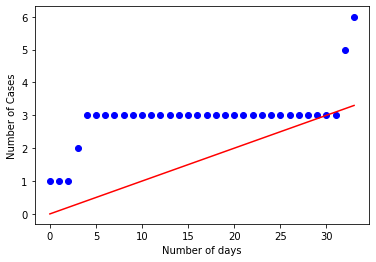

In [272]:
sr = serial(len(stage[0]))
parameter.append(Regression(sr,stage[0]))

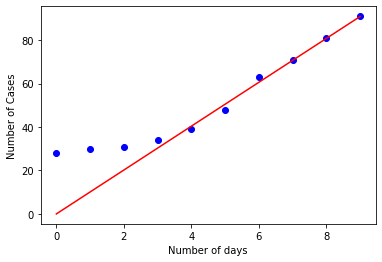

In [273]:
sr = serial(len(stage[1]))
parameter.append(Regression(sr,stage[1]))

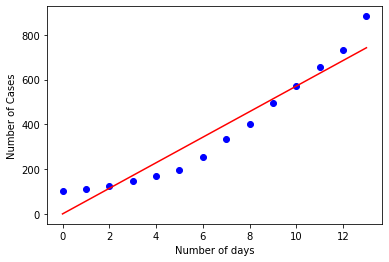

In [274]:
sr = serial(len(stage[2]))
parameter.append(Regression(sr,stage[2]))

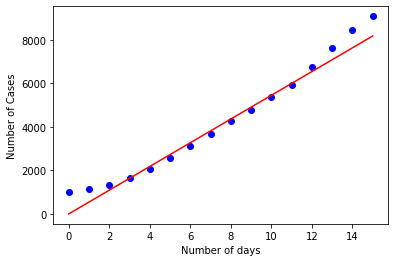

In [275]:
sr = serial(len(stage[3]))
parameter.append(Regression(sr,stage[3]))

In [276]:
parameter

[0.1, 10.1, 57.1, 544.7]

we got essential data to find the relation between the stages as discussed in the documentation

In [277]:
stage_relation = [] # All the coefficients of all stages with respect to stage 1

In [278]:
for i in range(4):
    stage_relation.append(parameter[i]/parameter[0])

In [279]:
stage_relation

[1.0, 100.99999999999999, 571.0, 5447.0]

#### Relation between different stages
##### stage1 = stage1
##### stage2 = 101 * stage1
##### stage3 = 571 * stage1
##### stage4 = 5447 * stage1
##### stage5 is an empty list

### Next aim is to find the Levels to find conditional probablity of infection as per documentation

In [280]:
st_dif=[[],[],[],[]]
for i in range(len(India[0])-1):
    if(India[0][i]/10 < 1):
        st_dif[0].append(dif[0][i])
    elif(India[0][i]/10 > 1 and India[0][i]/100 < 1):
        st_dif[1].append(dif[0][i])
    elif(India[0][i]/10 > 1 and India[0][i]/100 >1 and India[0][i]/1000 < 1 ):
        st_dif[2].append(dif[0][i])
    elif(India[0][i]/10 > 1 and India[0][i]/100 >1 and India[0][i]/1000 > 1 and India[0][i]/10000 < 1):
        st_dif[3].append(dif[0][i])
    else:
        stage5.append(India[0][i])

#### Creating a parameter1 list to load essential data of Levels

In [281]:
parameter1=[]

#### Finding the coefficient of all the Levels using regression function

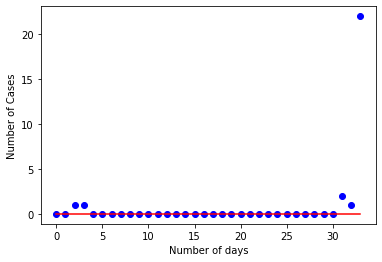

In [282]:
sr = serial(len(st_dif[0]))
parameter1.append(Regression(sr,st_dif[0]))

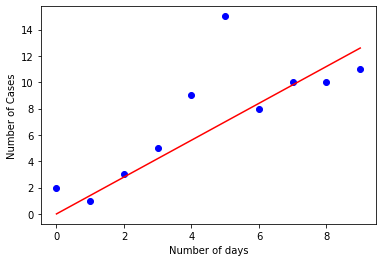

In [283]:
sr = serial(len(st_dif[1]))
parameter1.append(Regression(sr,st_dif[1]))

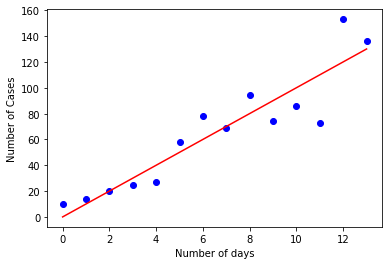

In [284]:
sr = serial(len(st_dif[2]))
parameter1.append(Regression(sr,st_dif[2]))

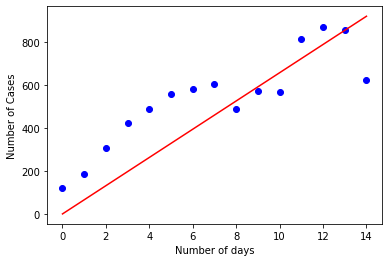

In [285]:
sr = serial(len(st_dif[3]))
parameter1.append(Regression(sr,st_dif[3]))

In [286]:
parameter1

[0.0, 1.4, 10.0, 65.7]

In [287]:
level_relation = []
for i in range(4):
    level_relation.append(parameter1[i]/parameter1[1])

In [288]:
level_relation

[0.0, 1.0, 7.142857142857143, 46.92857142857143]

#### Relation between different Levels
##### level1 = 0 (Conditions of perfect lockdown)
##### level2 = 1 * level2  (Conditions for imperfect lockdown)
##### level3 = 7 * level2 ( Condition for impoerfect lockdown with illegal gathering)
##### level4 = 47 * level2 (No restrictions)
##### level5 is an empty list

## Calculating the probablity for the Recovery rate
#### Calculating with the help of regression model

In [289]:
death_recovery = []

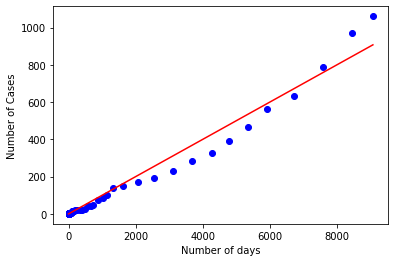

In [290]:
death_recovery.append(Regression(India[0],India[1]))

#### Calculating with the help of probablity

In [291]:
pro_death_recovery = []

In [292]:
p = max(India[1])/max(India[0])

In [293]:
pro_death_recovery.append(p)

#### regression model and probablity are giving the same parameter

## Calculating the death rate

#### Calculating with the help of regression model

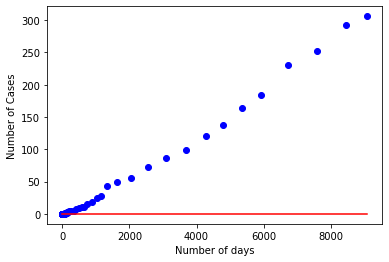

In [294]:
death_recovery.append(Regression(India[0],India[2]))

As most of the cases are 0 hence the parameter came to 0. but number of cases is directly proportional to death rate. Hence we are going for probablity

In [295]:
p = max(India[2])/max(India[0])

In [296]:
p

0.03371529308065227

In [297]:
pro_death_recovery.append(p)

In [298]:
print(death_recovery)
print(pro_death_recovery)

[0.1, 0.0]
[0.11690171881886294, 0.03371529308065227]


pro_death_Recovery is more accurate. hence discarding regression parameter

In [299]:
del(death_recovery)

## Calculating the conditional probablity for pandemic Infection

In [547]:
def probablity(parameter1,x):
    s = 0
    l1=int(input("Enter how many infected person are toally lockdown"))
    l2=int(input("Enter how many infected person have gone with maximum social distancing"))
    l3=int(input("Enter how many infected person and meet some people"))
    l4=int(input("Enter how many infected person had illegal gahtering or government had not declared lockdown"))
    if(l1 != 0 ):
        l1 = l1
        s = 0
    if(l2 != 0):
        l2 = l2
        s = 1
    if(l3 != 0 ):
        l3 = l3
        s = 2
    if(l4 != 0):
        l4 = l4
        s = 3
    m = s*15
    result = (l1*level_relation[0]) + (l2*level_relation[1]) + (l3*level_relation[2]) + (l4*level_relation[3])
    probablity = result/(level_relation[s]*m)
    return probablity 

In [535]:
probablity(parameter1,3)

Enter how many infected person are toally lockdown1
Enter how many infected person have gone with maximum social distancing1
Enter how many infected person and meet some people1
Enter how many infected person had illegal gahtering or government had not declared lockdown1


0.019558599695585994

## Compiling all the functions and paramers 

### 1) Calculation of Stages
### 2) Calculation of Levels
### 3) Calculation of conditional probablity for infection
### 4) Calculation of death and recovery rate

In [477]:
def main():
    print("Welcome to pandemic forecasting")
    x = int(input("Enter the number of cases = "))
    x1 = int(input("Enter the number of days in the range of 14 of which you want to predict = "))
    if(x/10 < 1):
        s = 0
    elif(x/10 > 1 and x/100 < 1):
        s = 1
    elif(x/10 > 1 and x/100 >1 and x/1000 < 1 ):
        s = 2
    elif(x/10 > 1 and x/100 >1 and x/1000 > 1 and x/10000 < 1):
        s = 3
    else:
        print("This stage is not present please update the model")
    pro = probablity(parameter1,x)
    death = x*pro_death_recovery[1]
    recovery = x*pro_death_recovery[0]
    print("Previous death calculated = " , death , recovery)
    ypred = (parameter[s]*x1)+(stage_relation[s]*pro) - death - recovery
    death = ypred*pro_death_recovery[1]
    recovery = ypred*pro_death_recovery[0]
    print(pro , stage_relation[s] , parameter[0]*x1)
    print("Number of confirmed cases will be = " , ypred)
    print("Number of death on that day will be = " , death)
    print("Number of recovery on that day will be = ",recovery)
    return ypred ,  death , recovery

In [556]:
ypr = []
de = []
re = []

In [558]:
a,b,c = main()
ypr.append(a)
de.append(b)
re.append(c)

Welcome to pandemic forecasting
Enter the number of cases = 28
Enter the number of days in the range of 14 of which you want to predict = 14
Enter how many infected person are toally lockdown0
Enter how many infected person have gone with maximum social distancing18
Enter how many infected person and meet some people10
Enter how many infected person had illegal gahtering or government had not declared lockdown0
Previous death calculated =  0.9440282062582636 3.2732481269281624
0.4173333333333333 100.99999999999999 1.4000000000000001
Number of confirmed cases will be =  179.33339033348022
Number of death on that day will be =  6.046277814240298
Number of recovery on that day will be =  20.964381571597897


In [559]:
a,b,c = main()
ypr.append(a)
de.append(b)
re.append(c)

Welcome to pandemic forecasting
Enter the number of cases = 30
Enter the number of days in the range of 14 of which you want to predict = 14
Enter how many infected person are toally lockdown0
Enter how many infected person have gone with maximum social distancing12
Enter how many infected person and meet some people18
Enter how many infected person had illegal gahtering or government had not declared lockdown0
Previous death calculated =  1.0114587924195682 3.507051564565888
0.656 100.99999999999999 1.4000000000000001
Number of confirmed cases will be =  203.13748964301453
Number of death on that day will be =  6.8488399989822
Number of recovery on that day will be =  23.747121695817366


In [560]:
a,b,c = main()
ypr.append(a)
de.append(b)
re.append(c)

Welcome to pandemic forecasting
Enter the number of cases = 31
Enter the number of days in the range of 14 of which you want to predict = 14
Enter how many infected person are toally lockdown0
Enter how many infected person have gone with maximum social distancing0
Enter how many infected person and meet some people31
Enter how many infected person had illegal gahtering or government had not declared lockdown0
Previous death calculated =  1.0451740855002203 3.623953283384751
1.0333333333333332 100.99999999999999 1.4000000000000001
Number of confirmed cases will be =  241.09753929778168
Number of death on that day will be =  8.128674198448788
Number of recovery on that day will be =  28.184716746909032


In [561]:
#a,b,c = main()
#ypr.append(a)
#de.append(b)
#re.append(c)

## Testing the accuracy of the Model

In [562]:
print("Predicted Confirmed cases = ",ypr)
print("Predicted Death cases = ",de)
print("Predicted Recovery cases = ",re)

Predicted Confirmed cases =  [179.33339033348022, 203.13748964301453, 241.09753929778168]
Predicted Death cases =  [6.046277814240298, 6.8488399989822, 8.128674198448788]
Predicted Recovery cases =  [20.964381571597897, 23.747121695817366, 28.184716746909032]


In [563]:
ya = []
da = []
ra = []

In [564]:
for i in range(3):
    ya.append(India[0][34+14+i])
    da.append(India[2][34+14+i])
    ra.append(India[1][34+14+i])

In [565]:
print("Actual Confirmed Cases = ", ya)
print("Actual Death cases = ", da)
print("Actual Recovered cases = ",ra)

Actual Confirmed Cases =  [171, 198, 256]
Actual Death cases =  [3, 4, 4]
Actual Recovered cases =  [15, 20, 23]


## Accuracy

In [566]:
from sklearn.metrics import r2_score

In [567]:
r2_score(ya,ypr)

0.9157300240510555

In [568]:
r2_score(da,de)

-50.66247274740544

In [569]:
r2_score(ra,re)

-1.3417160085885955

The Accuracy can be increased. Actually i gave any random value in probablity level input section. The reason behind this is that data is only knowned by the infected person. If they tell us the correct information then we can achieve a good accuracy. This is the only reason i took only 3 value for testing. I intentionally added an extra value to overcome that part of error. If we get correct input our model will give the correct predictions 

# Thank you